# Crop images - Red Cross Challenge

In [89]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
from fiona.crs import from_epsg
import pycrs
import geopandas as gpd
import json
import rasterio as rasterio

In [90]:
buildings = gpd.read_file('../input/geojson/TrainingDataset.geojson')
buildings_json = json.loads(buildings.to_json())

In [ ]:
# print(buildings.head())

In [ ]:
list(buildings)

In [91]:
def getFeatures(gdf_json, i):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    return [gdf_json['features'][i]['geometry']]

In [92]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
from fiona.crs import from_epsg
import pycrs

In [93]:
def bounding_box(points):
    x_coordinates, y_coordinates = zip(*points)
    return [(min(x_coordinates), min(y_coordinates)), (max(x_coordinates), max(y_coordinates))]

In [94]:
import os
path = '../input/images/'
files = os.listdir(path)
files = ['RescUAV_12917_Philipsburg.tif']

In [95]:
imgs = {}
count = 0
for file in files:
    filepath = '../input/images/' + file
    print(filepath)
    #count = 0
    for x in range(len(buildings_json['features'])):
        if count > 400:
            continue
        building_coords = getFeatures(buildings_json, x)
        damage = buildings_json['features'][x]['properties']['_damage']
        objectid = buildings_json['features'][x]['properties']['OBJECTID']
        try:
            box_coord = bounding_box(building_coords[0]['coordinates'][0][0])
        except TypeError: 
            continue
        sat = rasterio.open(filepath)

        bbox = box(box_coord[0][0], box_coord[0][1], box_coord[1][0], box_coord[1][1])
        geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=sat.crs.data)

        coords = getFeatures(json.loads(geo.to_json()), 0)
        try:
            out_img, out_transform = mask(sat, shapes=coords, crop=True)
        except:
            continue
        out_meta = sat.meta.copy()
        out_meta.update({"driver": "GTiff",
                        "height": out_img.shape[1],
                         "width": out_img.shape[2],
                         "transform": out_transform})
        out_tif =  str(objectid) + "_" + file + "_" + damage +  ".jpeg"
        print("Saving " + out_tif)
        count += 1
        with rasterio.open(out_tif, "w", **out_meta) as dest:
           dest.write(out_img)
        if (damage not in imgs):
            imgs[damage] = []
        imgs[damage].append(out_img)
    print('done ' + str(count))

../input/images/RescUAV_12917_Philipsburg.tif
Saving 4_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 15_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 16_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 35_RescUAV_12917_Philipsburg.tif_destroyed.jpeg
Saving 38_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 49_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 55_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 62_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 136_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 137_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 140_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 141_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 142_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 187_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 190_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 195_RescUAV_12917_Philipsburg.tif_destroyed.jpeg
Saving 198_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 200_RescUAV_12917_Philipsburg.tif_partial.jpeg
Sa

Saving 661_RescUAV_12917_Philipsburg.tif_destroyed.jpeg
Saving 662_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 663_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 664_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 665_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 666_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 667_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 668_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 669_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 670_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 671_RescUAV_12917_Philipsburg.tif_destroyed.jpeg
Saving 672_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 673_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 674_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 675_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 676_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 677_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 678_RescUAV_12917_Philipsburg.tif_partial.jpeg
Sa

Saving 819_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 820_RescUAV_12917_Philipsburg.tif_destroyed.jpeg
Saving 821_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 822_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 823_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 824_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 825_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 826_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 827_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 828_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 829_RescUAV_12917_Philipsburg.tif_none.jpeg
Saving 830_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 831_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 832_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 833_RescUAV_12917_Philipsburg.tif_destroyed.jpeg
Saving 834_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 835_RescUAV_12917_Philipsburg.tif_significant.jpeg
Saving 836_RescUAV_12917_Philipsburg.tif_partial.jpeg
Saving 837_Resc

In [96]:
imgs.keys()

dict_keys(['significant', 'none', 'destroyed', 'partial', 'unknown'])

In [101]:
len(imgs['destroyed'])

41

In [ ]:
show(imgs['none'][36])

In [ ]:
img = imgs['partial'][120]
show(img)
print(imgs['partial'][120][0])

45.85303197059473
0.28873372209383547
68.40536851833205


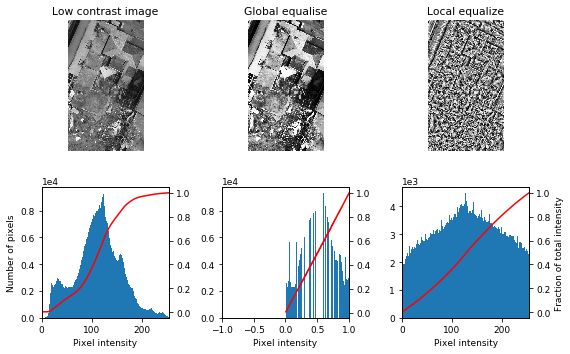

In [103]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank


matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    print(np.std(image.ravel()))
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = img_as_ubyte(imgs['destroyed'][15][0])

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
selem = disk(30)
img_eq = rank.equalize(img, selem=selem)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [ ]:
"""
=========================
Filtering regional maxima
=========================

Here, we use morphological reconstruction to create a background image, which
we can subtract from the original image to isolate bright features (regional
maxima).

First we try reconstruction by dilation starting at the edges of the image. We
initialize a seed image to the minimum intensity of the image, and set its
border to be the pixel values in the original image. These maximal pixels will
get dilated in order to reconstruct the background image.

"""
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(imgs['none'][35][0])
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

######################################################################
# Subtracting the dilated image leaves an image with just the coins and a
# flat, black background, as shown below.

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

######################################################################
# Although the features (i.e. the coins) are clearly isolated, the coins
# surrounded by a bright background in the original image are dimmer in the
# subtracted image. We can attempt to correct this using a different seed
# image.
#
# Instead of creating a seed image with maxima along the image border, we can
# use the features of the image itself to seed the reconstruction process.
# Here, the seed image is the original image minus a fixed value, ``h``.

h = 0.4
seed = image - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = image - dilated

######################################################################
# To get a feel for the reconstruction process, we plot the intensity of the
# mask, seed, and dilated images along a slice of the image (indicated by red
# line).

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.5))
yslice = 197

ax0.plot(mask[yslice], '0.5', label='mask')
ax0.plot(seed[yslice], 'k', label='seed')
ax0.plot(dilated[yslice], 'r', label='dilated')
ax0.set_ylim(-0.2, 2)
ax0.set_title('image slice')
ax0.set_xticks([])
ax0.legend()

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.axhline(yslice, color='r', alpha=0.4)
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.axhline(yslice, color='r', alpha=0.4)
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
plt.show()

######################################################################
# As you can see in the image slice, each coin is given a different baseline
# intensity in the reconstructed image; this is because we used the local
# intensity (shifted by ``h``) as a seed value. As a result, the coins in the
# subtracted image have similar pixel intensities. The final result is known
# as the h-dome of an image since this tends to isolate regional maxima of
# height ``h``. This operation is particularly useful when your images are
# unevenly illuminated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = imgs['none'][63][0]

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [ ]:
# Getting thumbnail image of satellite image
# Tutorial: https://geohackweek.github.io/raster/04-workingwithrasters/
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

filepath = '../input/afterimg/IGN_Feb2017_20CM.tif'
with rasterio.open(filepath) as src:
    print(src.profile)

# The grid of raster values can be accessed as a numpy array and plotted:
with rasterio.open(filepath) as src:
   oviews = src.overviews(1) # list of overviews from biggest to smallest
   oview = oviews[3] # let's look at the smallest thumbnail
#    print('Decimation factor= {}'.format(oview))
   # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
   thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

# print('array type: ',type(thumbnail))
# print(thumbnail)

plt.figure(figsize = (100, 60))
plt.imshow(thumbnail, interpolation='nearest', aspect='auto')
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')